In [ ]:
import pandas as pd


In [ ]:
path="/content/Stock_data.csv"

df= pd.read_csv(path)
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12890 entries, 0 to 12889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gmt time  12890 non-null  object 
 1   Volume    12890 non-null  float64
 2   Open      12890 non-null  float64
 3   High      12890 non-null  float64
 4   Low       12890 non-null  float64
 5   Close     12890 non-null  float64
dtypes: float64(5), object(1)
memory usage: 604.3+ KB


In [ ]:
df.shape

(12890, 6)

In [ ]:
df['Gmt time'] = pd.to_datetime(df['Gmt time'], format= "%d.%m.%Y %H:%M:%S.%f")

df['Gmt time']

0       2012-12-12 00:00:00
1       2012-12-12 04:00:00
2       2012-12-12 08:00:00
3       2012-12-12 12:00:00
4       2012-12-12 16:00:00
                ...        
12885   2020-12-11 04:00:00
12886   2020-12-11 08:00:00
12887   2020-12-11 12:00:00
12888   2020-12-11 16:00:00
12889   2020-12-11 20:00:00
Name: Gmt time, Length: 12890, dtype: datetime64[ns]

Enter a start date YYYY-MM-DD2020-01-01
Enter a end date YYYY-MM-DD2020-11-01


<ipython-input-88-a2085d268c6f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['12dayEWM'] = new_df1['Close'].ewm(span=12, adjust=False).mean()
<ipython-input-88-a2085d268c6f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['26dayEWM'] = new_df1['Close'].ewm(span=26, adjust=False).mean()


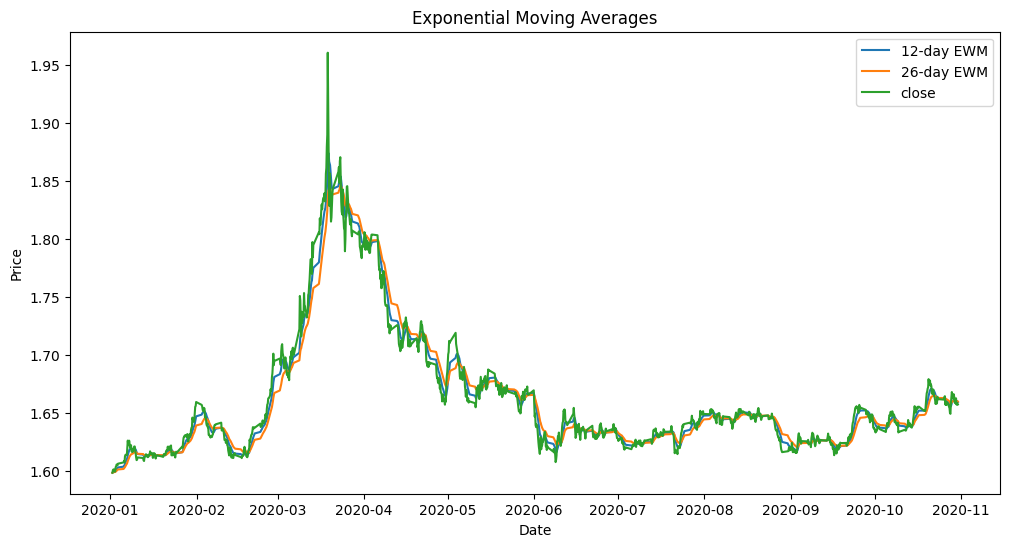

In [ ]:
#Exponential Moving Average

#ema- EMA is a calculation that, similar to SMA, provides an average of a stock's closing prices over a specific period.
# However, EMA gives more weight to recent prices, making it more sensitive to recent price movements.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#1) Ask user for start date and end date between that period calculate.

startd= input("Enter a start date YYYY-MM-DD")
endd= input("Enter a end date YYYY-MM-DD")

#chagining each date entrty to datetime year, month, date format
startd = pd.to_datetime(startd, format= "%Y.%m.%d")
endd = pd.to_datetime(endd, format= "%Y.%m.%d")


#when taking the dates, this is making sure that the Gmt time is between the user's start and end date
new_df1 = df[(df['Gmt time'] >=  startd) & (df['Gmt time'] <= endd)]

#12-period EMA and 26-period EMA are two moving averages.
new_df1['12dayEWM'] = new_df1['Close'].ewm(span=12, adjust=False).mean()
new_df1['26dayEWM'] = new_df1['Close'].ewm(span=26, adjust=False).mean()
new_df1



#Calculate them and plot These two with Close price in a line chart
plt.figure(figsize=(12, 6))

plt.plot(new_df1['Gmt time'],new_df1['12dayEWM'], label='12-day EWM')
plt.plot(new_df1['Gmt time'],new_df1['26dayEWM'], label='26-day EWM')
plt.plot(new_df1['Gmt time'],new_df1['Close'], label='close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Exponential Moving Averages')
plt.legend()

# Show the plot
plt.show()

Enter a start date YYYY-MM-DD2019-01-01
Enter a end date YYYY-MM-DD2019-12-01


<ipython-input-92-eec1d8023fb1>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['12daySMA'] = new_df['Close'].rolling(window=12).mean()
<ipython-input-92-eec1d8023fb1>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['26daySMA'] = new_df['Close'].rolling(window=26).mean()


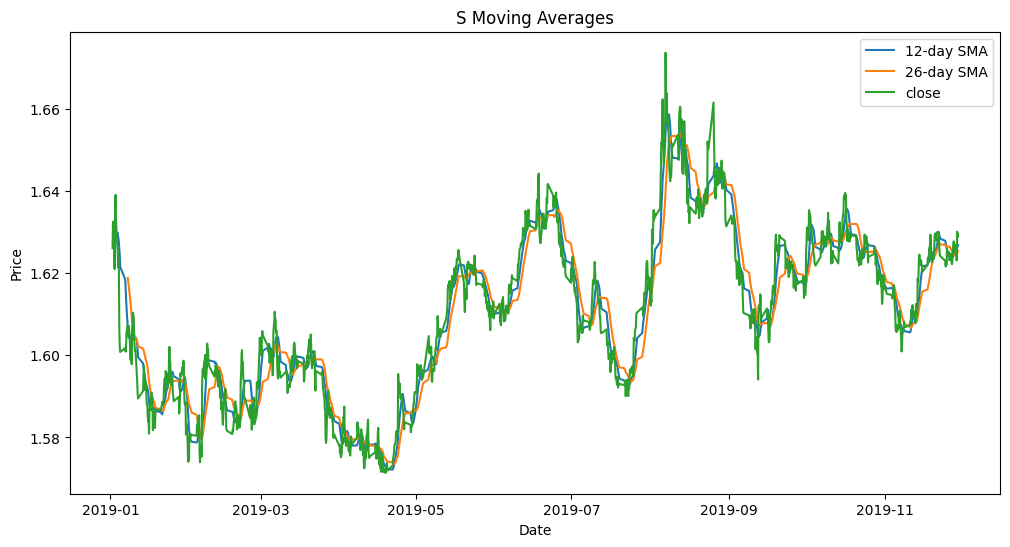

In [ ]:
# 2) Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA are two moving averages. Calculate them and plot These two with Close price in a line chart

# a)  compare SMA 12 EMA 12 and CLOSE

# b) compare SMA 26 EMA 26 and CLOSE


# SMA- is the average of data points.SMA is a calculation that provides the
#average value of a stock's closing prices over a specific period, giving equal weight to each day within that period.
#If you calculate a 12-day SMA,
# you would add up the closing prices of the last 12 days and then divide by 12.
# This gives equal weight to each of the past 10 days.


#Simple Moving Average
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#1) Ask user for start date and end date between that period calculate.

startd= input("Enter a start date YYYY-MM-DD")
endd= input("Enter a end date YYYY-MM-DD")

startd = pd.to_datetime(startd, format= "%Y.%m.%d")
endd = pd.to_datetime(endd, format= "%Y.%m.%d")

new_df = df[(df['Gmt time'] >=  startd) & (df['Gmt time'] <= endd)]

# 12-period SMA and 26-period SMA are two moving averages.

#.rolling(window=12) is the number of data points being used
new_df['12daySMA'] = new_df['Close'].rolling(window=12).mean()
new_df['26daySMA'] = new_df['Close'].rolling(window=26).mean()

new_df



#Calculate them and plot These two with Close price in a line chart
plt.figure(figsize=(12, 6))

plt.plot(new_df['Gmt time'], new_df['12daySMA'], label='12-day SMA')
plt.plot(new_df['Gmt time'], new_df['26daySMA'], label='26-day SMA')
plt.plot(new_df['Gmt time'],new_df['Close'], label='close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S Moving Averages')
plt.legend()

# Show the plot
plt.show()







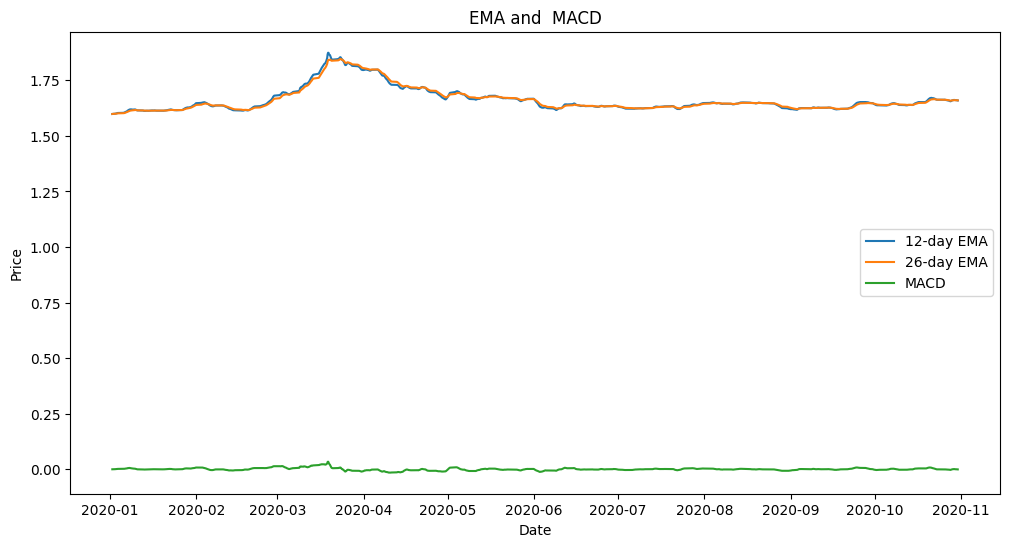

In [ ]:
# 3) calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD


#MACD - shows when a stock's short-term trend is getting stronger or weaker compared to its long-term trend.
#The MACD line is the difference between two Exponential Moving Averages (EMAs)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


new_df = df[(df['Gmt time'] >= startd) & (df['Gmt time'] <= endd)]

# Calculate the 12-day and 26-day EMAs
ema12 = new_df1['Close'].ewm(span=12, adjust=False).mean()
ema26 = new_df1['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD
macd = ema12 - ema26

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(new_df1['Gmt time'], ema12, label='12-day EMA')
plt.plot(new_df1['Gmt time'], ema26, label='26-day EMA')
plt.plot(new_df1['Gmt time'], macd, label='MACD')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA and  MACD')
plt.legend()

# Show the plot
plt.show()




In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

In [ ]:
#4. Calculate RSI, Bollinger bands and ADX using the notebook for our own data
#RSI- helps determine whether a stock is overbought or oversold, indicating potential reversal points.
#RSI is a number between 0 and 100 that measures the speed and change of price movements.
#RSI is calculated based on the average gain and average loss over a specified period, often 14 days.

In [ ]:


#RSI 12 and 26

# Calculate RSI with the default time period
df['RSI_12'] = talib.RSI(df['Close'], timeperiod = 12)

print(df.tail())

df['RSI_26'] = talib.RSI(df['Close'], timeperiod = 26)

print(df.tail())

                 Gmt time    Volume      Open      High       Low     Close  \
12885 2020-12-11 04:00:00  19540.22  1.607955  1.608915  1.604095  1.605455   
12886 2020-12-11 08:00:00  48969.47  1.605465  1.611820  1.605225  1.609935   
12887 2020-12-11 12:00:00  49848.50  1.609930  1.611365  1.606575  1.606745   
12888 2020-12-11 16:00:00  23094.53  1.606720  1.609540  1.605880  1.607315   
12889 2020-12-11 20:00:00   5512.42  1.607310  1.608910  1.606925  1.607785   

             RSI        ADX     RSI_12  
12885  25.962439  29.554951  23.978055  
12886  34.488261  30.145451  33.948185  
12887  31.689908  30.693773  30.809500  
12888  32.740071  31.310254  32.034379  
12889  33.645901  31.882701  33.099714  
                 Gmt time    Volume      Open      High       Low     Close  \
12885 2020-12-11 04:00:00  19540.22  1.607955  1.608915  1.604095  1.605455   
12886 2020-12-11 08:00:00  48969.47  1.605465  1.611820  1.605225  1.609935   
12887 2020-12-11 12:00:00  49848.50  1.609

In [ ]:
#Bollinger bands
upper, mid, lower = talib.BBANDS(df['Close'],
                                 nbdevup=2,
                                 nbdevdn=2,
                                 timeperiod=20)

print(upper, mid, lower)
# plt.figure(figsize=(16, 8))

# # Plot the Bollinger Bands
# plt.plot(df['Close'], label='Price')
# plt.plot(upper, color='Red' , label='Upper band')
# plt.plot(mid, color='Green', label='Middle band')
# plt.plot(lower, color='black', label='Lower band')

# # Customize and show the plot
# plt.title('Bollinger Bands')
# plt.legend()
# plt.show()


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
12885    1.641290
12886    1.640559
12887    1.639459
12888    1.637945
12889    1.635902
Length: 12890, dtype: float64 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
12885    1.622749
12886    1.621672
12887    1.620331
12888    1.619021
12889    1.617706
Length: 12890, dtype: float64 0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
12885    1.604208
12886    1.602784
12887    1.601204
12888    1.600097
12889    1.599511
Length: 12890, dtype: float64


In [ ]:
# Calculate the ADX with the default time period
df['ADX'] = talib.ADX(df['High'],
                         df['Low'],
                         df['Close'])

# Print the last five rows
print(df.tail())

                 Gmt time    Volume      Open      High       Low     Close  \
12885 2020-12-11 04:00:00  19540.22  1.607955  1.608915  1.604095  1.605455   
12886 2020-12-11 08:00:00  48969.47  1.605465  1.611820  1.605225  1.609935   
12887 2020-12-11 12:00:00  49848.50  1.609930  1.611365  1.606575  1.606745   
12888 2020-12-11 16:00:00  23094.53  1.606720  1.609540  1.605880  1.607315   
12889 2020-12-11 20:00:00   5512.42  1.607310  1.608910  1.606925  1.607785   

             RSI        ADX  
12885  25.962439  29.554951  
12886  34.488261  30.145451  
12887  31.689908  30.693773  
12888  32.740071  31.310254  
12889  33.645901  31.882701  


In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(df['Gmt time'],df['Close'])
ax2.set_ylabel('ADX')
ax2.plot(df['Gmt time'],df['ADX'], color='orange')

ax1.set_title('Price and ADX')
plt.show()

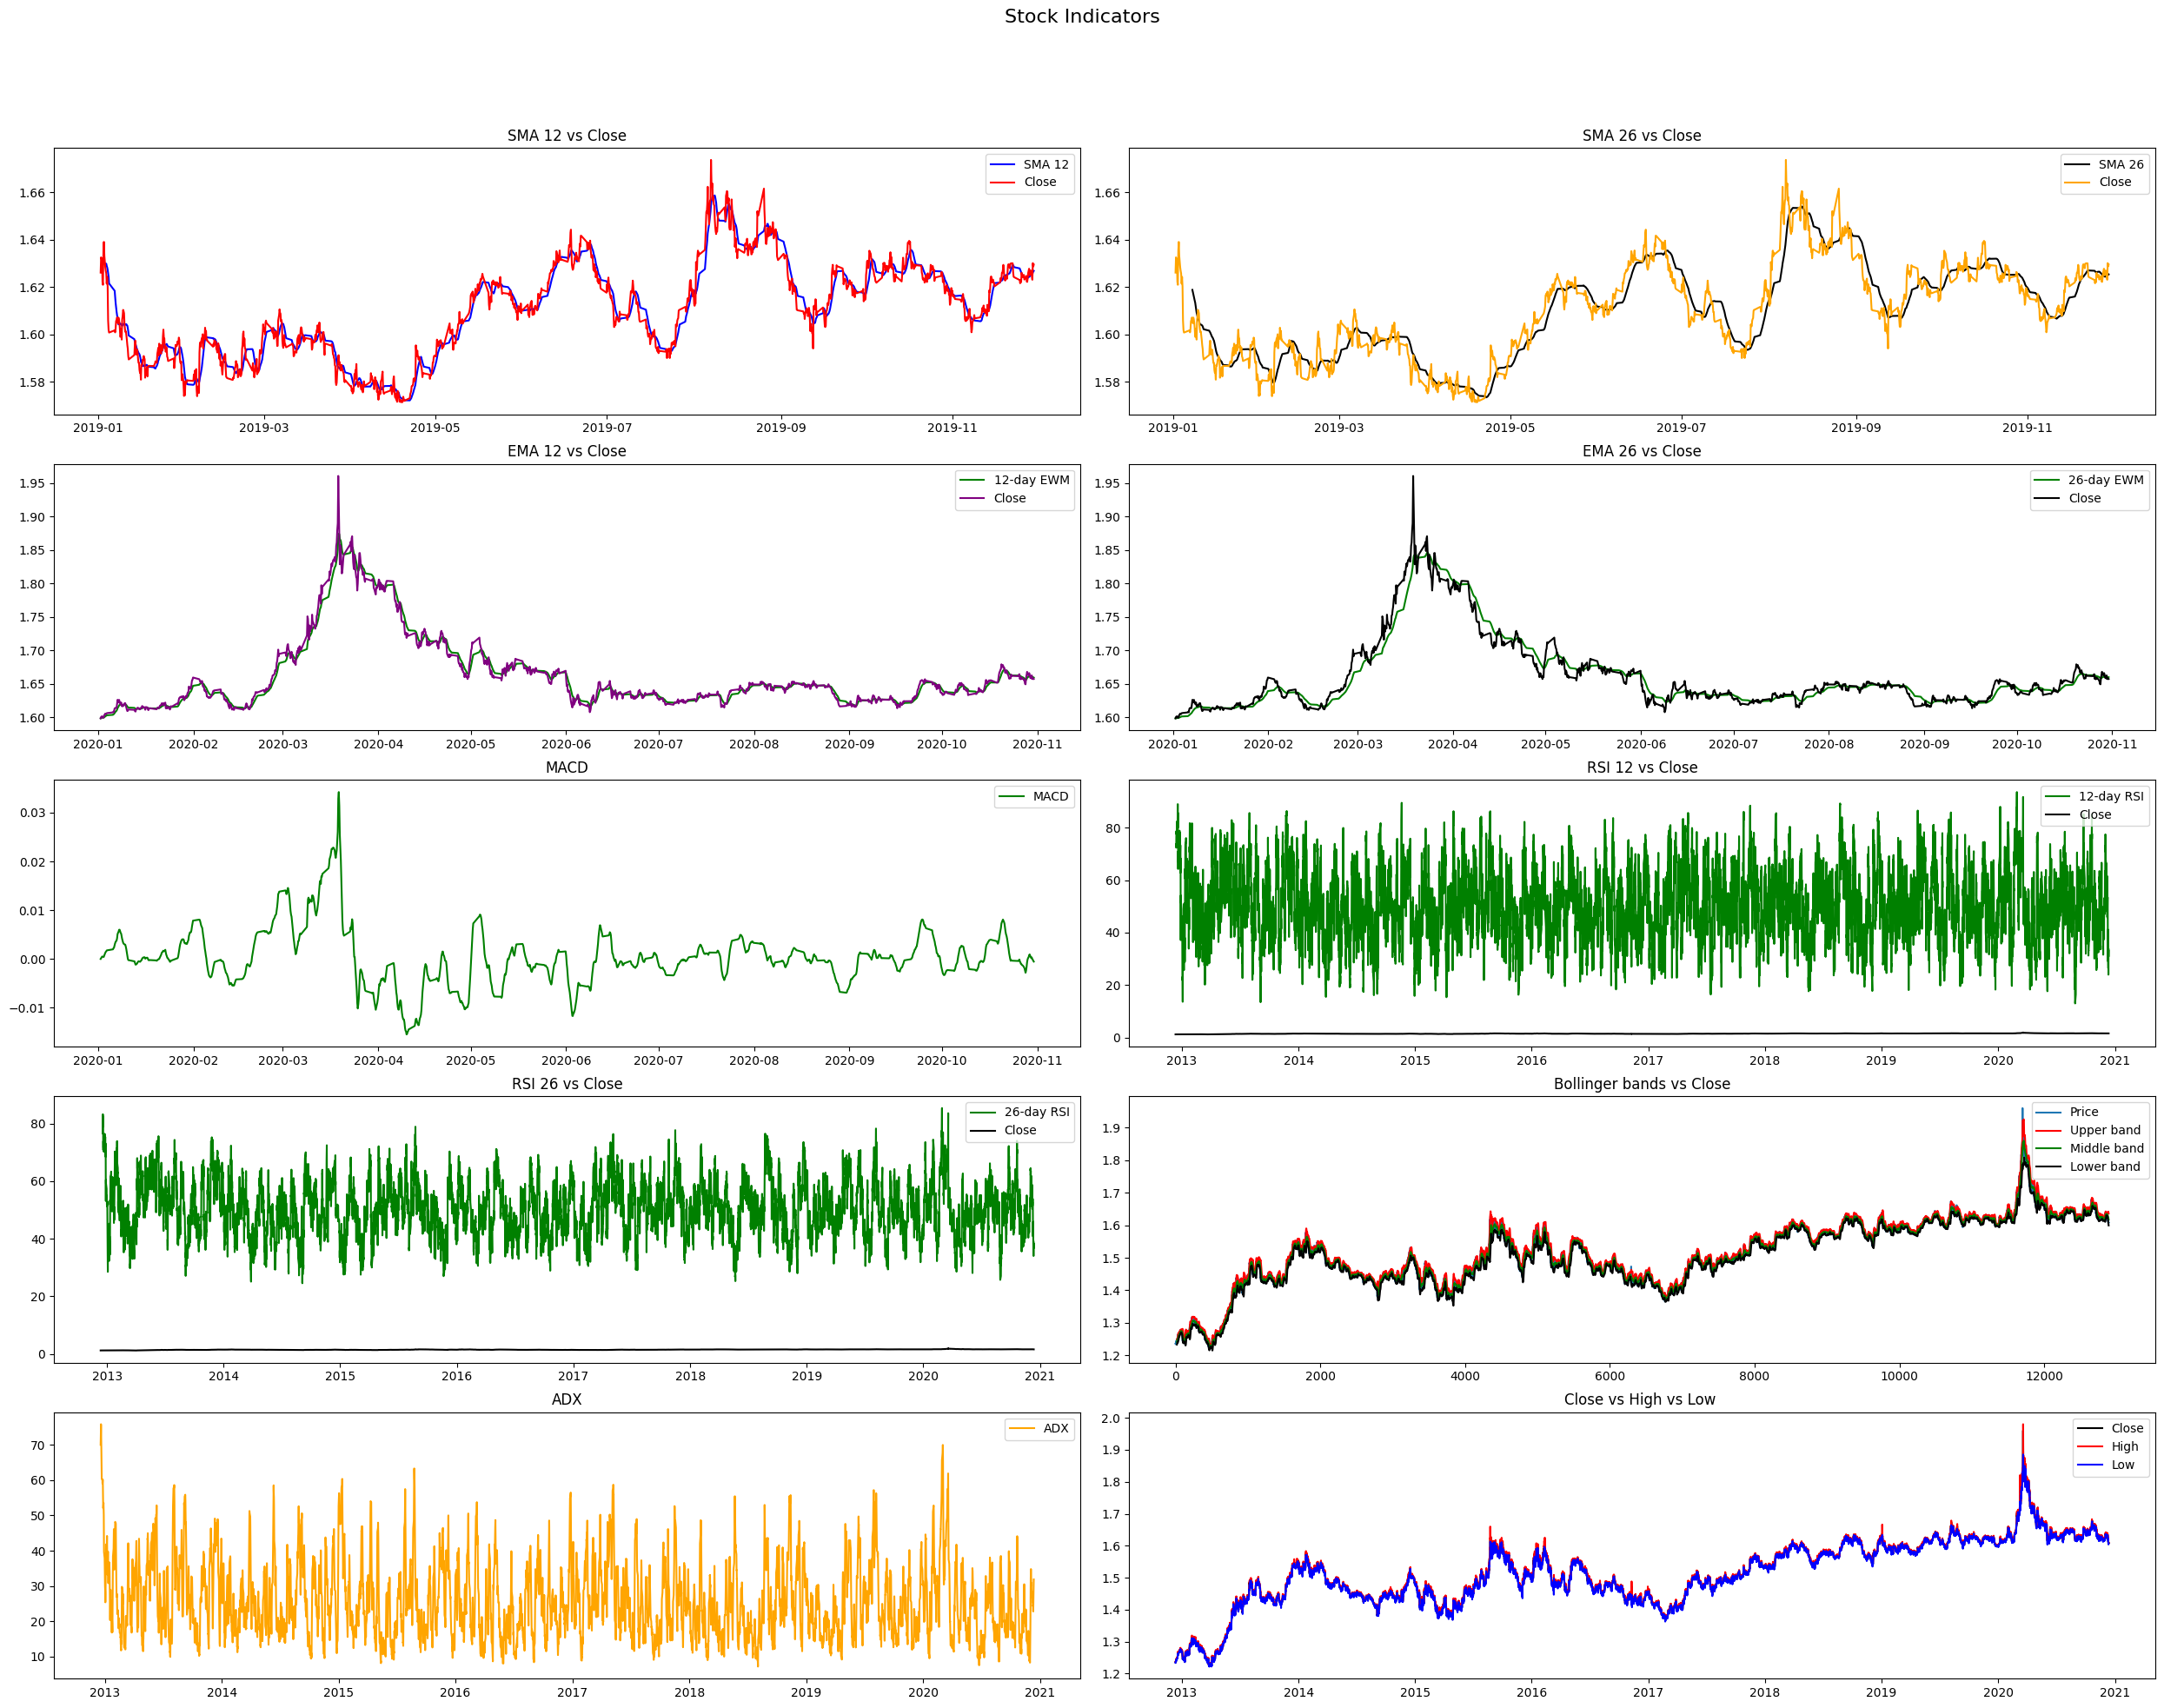

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(5, 2, figsize=(25, 20))
fig.suptitle("Stock Indicators", fontsize=16)

# Plot SMA 12 vs close on the first subplot (top-left)
axes[0, 0].plot(new_df['Gmt time'], new_df['12daySMA'], label='SMA 12', color='blue')
axes[0, 0].plot(new_df['Gmt time'], new_df['Close'], label='Close', color='red')
axes[0, 0].set_title("SMA 12 vs Close")
axes[0, 0].legend()

# Plot SMA 26 vs close on the second subplot (top-right)
axes[0, 1].plot(new_df['Gmt time'], new_df['26daySMA'], label='SMA 26', color='black')
axes[0, 1].plot(new_df['Gmt time'], new_df['Close'], label='Close', color='orange')
axes[0, 1].set_title("SMA 26 vs Close")
axes[0, 1].legend()

# Plot EMA 12 vs close on the third subplot (bottom-left)
axes[1, 0].plot(new_df1['Gmt time'], new_df1['12dayEWM'], label='12-day EWM', color='green')
axes[1, 0].plot(new_df1['Gmt time'], new_df1['Close'], label='Close', color='purple')
axes[1, 0].set_title("EMA 12 vs Close")
axes[1, 0].legend()

#Plot EMA 26 vs close

axes[1, 1].plot(new_df1['Gmt time'], new_df1['26dayEWM'], label='26-day EWM', color='green')
axes[1, 1].plot(new_df1['Gmt time'], new_df1['Close'], label='Close', color='black')
axes[1, 1].set_title("EMA 26 vs Close")
axes[1, 1].legend()

# 5) MACD
axes[2, 0].plot(new_df1['Gmt time'], macd,label='MACD', color='green')
axes[2, 0].set_title("MACD")
axes[2, 0].legend()

# 6) RSI 12 vs close
axes[2, 1].plot(df['Gmt time'], df['RSI_12'], label='12-day RSI', color='green')
axes[2, 1].plot(df['Gmt time'], df['Close'], label='Close', color='black')
axes[2, 1].set_title("RSI 12 vs Close")
axes[2, 1].legend()


# 7) RSI 26 vs close
axes[3, 0].plot(df['Gmt time'], df['RSI_26'], label='26-day RSI', color='green')
axes[3, 0].plot(df['Gmt time'], df['Close'], label='Close', color='black')
axes[3, 0].set_title("RSI 26 vs Close")
axes[3, 0].legend()

# 8) Bollinger bands all three vs close

axes[3, 1].plot(df['Close'], label='Price')
axes[3, 1].plot(upper, color='Red' , label='Upper band')
axes[3, 1].plot(mid, color='Green', label='Middle band')
axes[3, 1].plot(lower, color='black', label='Lower band')
axes[3, 1].set_title("Bollinger bands vs Close")
axes[3, 1].legend()




# 9) ADX

axes[4, 0].plot(df['Gmt time'],df['ADX'], color='orange', label='ADX')
axes[4, 0].set_title("ADX")
axes[4, 0].legend()

# 10) Close vs High vs Low
axes[4, 1].plot(df['Gmt time'],df['Close'], color='black', label='Close')
axes[4, 1].plot(df['Gmt time'],df['High'], color='red', label='High')
axes[4, 1].plot(df['Gmt time'],df['Low'], color='blue', label='Low')
axes[4, 1].set_title("Close vs High vs Low ")
axes[4, 1].legend()



# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


In [ ]:
df

,Gmt time,Volume,Open,High,Low,Close
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,2020-12-11 04:00:00,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,2020-12-11 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,2020-12-11 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,2020-12-11 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315


In [ ]:
#predict close price using linear regression model, Use Open high low as features
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [ ]:
x_df = df.drop('Close',axis='columns')
x_df

,Gmt time,Volume,Open,High,Low
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285
...,...,...,...,...,...
12885,2020-12-11 04:00:00,19540.2200,1.607955,1.608915,1.604095
12886,2020-12-11 08:00:00,48969.4700,1.605465,1.611820,1.605225
12887,2020-12-11 12:00:00,49848.5000,1.609930,1.611365,1.606575
12888,2020-12-11 16:00:00,23094.5300,1.606720,1.609540,1.605880


In [ ]:
x_df= x_df.loc[:,"Open":]
x_df

,Open,High,Low
0,1.234920,1.235890,1.233830
1,1.235210,1.235510,1.233860
2,1.234350,1.236370,1.233305
3,1.234910,1.237285,1.234850
4,1.236800,1.238700,1.236285
...,...,...,...
12885,1.607955,1.608915,1.604095
12886,1.605465,1.611820,1.605225
12887,1.609930,1.611365,1.606575
12888,1.606720,1.609540,1.605880


In [ ]:
Close= df.Close
Close

0        1.235200
1        1.234340
2        1.234905
3        1.236810
4        1.238205
           ...   
12885    1.605455
12886    1.609935
12887    1.606745
12888    1.607315
12889    1.607785
Name: Close, Length: 12890, dtype: float64

In [ ]:
reg.fit(x_df,Close)

LinearRegression()

In [ ]:
reg.predict([[1.734920, 1.735890, 1.733830]])
#y = mx + b

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.7348011])

In [ ]:
reg.coef_

array([-0.52832498,  0.7421294 ,  0.78590726])

In [ ]:
reg.intercept_

0.0005180852376553968

In [ ]:
close1= (-0.52832498*1.734920+ 0.7421294 *1.735890+0.78590726*1.733830)+0.0005180852376553968
close1


1.7348010997078556